### Важность признаков 

Очень часто вы хотите понять свой алгоритм, почему он именно так, а не иначе дал определенный ответ. Или если не понять его полностью, то хотя бы какие переменные больше всего влияют на результат. Из случайного леса можно довольно просто получить данную информацию.


По данной картинке интуитивно понятно, что важность признака «Возраст» в задаче кредитного скоринга выше, чем важность признака «Доход» . Формализуется это с помощью понятия прироста информации. 


Если построить много деревьев решений (случайный лес), то чем выше в среднем признак в дереве решений, тем он важнее в данной задаче классификации/регрессии. При каждом разбиении в каждом дереве улучшение критерия разделения (в нашем случае коэффициент Джини) — это показатель важности, связанный с переменной разделения, и накапливается он по всем деревьям леса отдельно для каждой переменной.

Давайте немного углубимся в детали. Среднее снижение точности, вызываемое переменной, определяется во время фазы вычисления out-of-bag ошибки. Чем больше уменьшается точность предсказаний из-за исключения (или перестановки) одной переменной, тем важнее эта переменная, и поэтому переменные с бо́льшим средним уменьшением точности более важны для классификации данных. Среднее уменьшение коэффициента Джини (или ошибки mse в задачах регрессии) является мерой того, как каждая переменная способствует однородности узлов и листьев в окончательной модели случайного леса. Каждый раз, когда отдельная переменная используется для разбиения узла, коэффициент Джини для дочерних узлов рассчитывается и сравнивается с коэффициентом исходного узла. Коэффициент Джини является мерой однородности от 0 (однородной) до 1 (гетерогенной). Изменения в значении критерия разделения суммируются для каждой переменной и нормируются в конце вычисления. Переменные, которые приводят к узлам с более высокой чистотой, имеют более высокое снижение коэффициента Джини.А теперь представим все вышеописанное в виде формул. 
$$ \large VI^{T} = \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_i^{T}\Big)}{\Big |\mathfrak{B}^T\Big |} - \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_{i,\pi_j}^{T}\Big)}{\Big |\mathfrak{B}^T\Big |} $$

$ \large \hat{y}_i^{(T)} = f^{T}(x_i)  $ — предсказание класса перед перестановкой/удалением признака

$ \large \hat{y}_{i,\pi_j}^{(T)} = f^{T}(x_{i,\pi_j})   $ — предсказание класса после перестановки/удаления признака

$ \large x_{i,\pi_j} = (x_{i,1}, \dots , x_{i,j-1}, \quad x_{\pi_j(i),j}, \quad x_{i,j+1}, \dots , x_{i,p})$

Заметим, что $ \large VI^{(T)}(x_j) = 0 $, если $ \large X_j $  не находится в дереве $ \large T $ 

Расчет важности признаков в ансамбле: 
— ненормированные 
    $$ \large VI(x_j) = \frac{\sum_{T=1}^{N}VI^{T}(x_j)}{N} $$

— нормированные 
    $$ \large z_j = \frac{VI(x_j)}{\frac{\hat{\sigma}}{\sqrt{N}}} $$
**Пример.**



Рассмотрим результаты анкетирования посетителей хостелов с сайтов Booking.com и TripAdvisor.com. Признаки — средние оценки по разным факторам (перечислены ниже) — персонал, состояние комнат и т.д. Целевой признак — рейтинг хостела на сайте.

In [3]:


from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor



Feature ranking:
1. Персонал 0.182757 
2. Цена/качество 0.148373 
3. Состояние общего пространства 0.128296 
4. Дополнительные услуги 0.116604 
5. ССЦ 0.106668 
6. Общие условия и удобства 0.088589 
7. Состояние общей кухни 0.074273 
8. Заезд в хостел и выезд из хостела 0.061521 
9. Бронирование хостела  0.053615 
10. Состояние комнаты 0.039305 


/home/mr9bit/.local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mr9bit/.local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


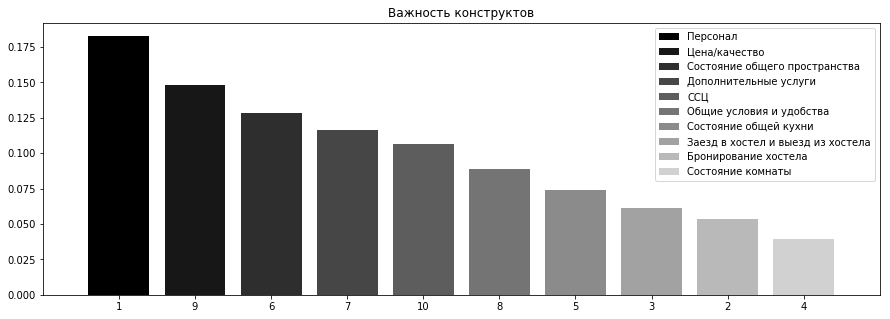

In [5]:
hostel_data = pd.read_csv("data/hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);